# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

# 1. 导入数据

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import statsmodels.api as sm

In [2]:
train = pd.read_csv("titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. 数据统计和清洗

## 2.1 数据清洗

### 不一致数据

In [3]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.5500,NaN,S
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,347071,7.7750,NaN,S
682,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.0,0,0,6563,9.2250,NaN,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


通过上述样本可以看出，大多数剧均满足每一个单元格内仅有一个值，`Ticket`变量似乎存在数据不一致的情况，需要进一步查看。

In [4]:
train["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

由上述结果，仍无法观察到船票的命名有何规律，但本研究的主要目的为预测乘客的存活情况，与船票的命名没有明显关联，故可以忽略。

### 缺失数据

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


乘客年龄`Age`，船票价格`Fare`和船舱号`Cabin`均存在缺失值。

#### 年龄缺失值

In [7]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


对于年龄缺失值，有两种处理方式：删去缺失值所在行，或使用平均值填充。由于预测数据中也有年龄数据的缺失，因此可以考虑使用平均值填充。

In [8]:
cleaned_train = train.copy()
cleaned_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
cleaned_train["Age"] = cleaned_train["Age"].fillna(cleaned_train["Age"].mean())
cleaned_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


#### 船舱缺失值

In [10]:
train[train["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


由于船舱的缺失值较多，且无法应用于逻辑回归，因此可以忽略缺失值

#### 港口缺失值

In [11]:
cleaned_train[cleaned_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [12]:
cleaned_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### 异常数值

In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


通过上述结果可以看出，并没有极大或极小的异常值

# 3. 可视化分析

In [14]:
cleaned_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [15]:
# 设置色盘
sns.set_palette("pastel")

In [16]:
# 设置figure的大小
plt.rcParams["figure.figsize"] = [7, 3.5]

#启用自动调整布局功能，避免画面出现遮挡
plt.rcParams["figure.autolayout"] = True

In [17]:
matplotlib.rc("font", family = 'Heiti TC') # 设置中文字体

## 3.1 分布情况

### 存活情况

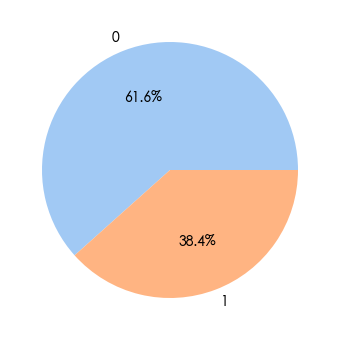

In [18]:
sv_count = cleaned_train["Survived"].value_counts()
sv_index = sv_count.index
plt.pie(sv_count, labels = sv_index, autopct="%.1f%%")
plt.show()

### 船舱等级分布

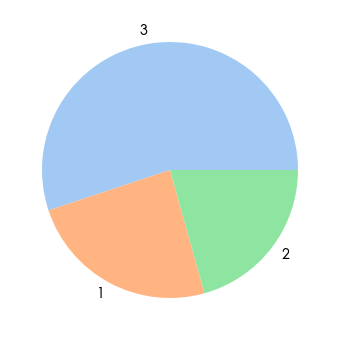

In [19]:
class_count = cleaned_train["Pclass"].value_counts()
class_label = class_count.index
plt.pie(class_count, labels = class_label)
plt.show()

### 性别分布情况

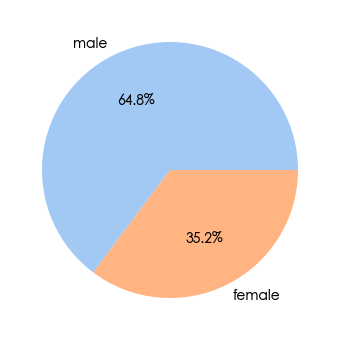

In [20]:
gender_count = cleaned_train["Sex"].value_counts()
gender_label = gender_count.index
plt.pie(gender_count, labels = gender_label, autopct="%.1f%%")
plt.show()

### 乘客年龄分布

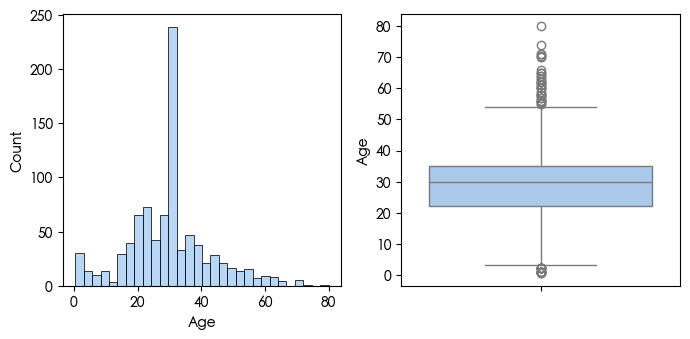

In [21]:
fig, axes = plt.subplots(1, 2)
sns.histplot(cleaned_train, x = "Age", ax = axes[0])
sns.boxplot(cleaned_train, y = "Age", ax = axes[1])
plt.show()

### 同行人数量

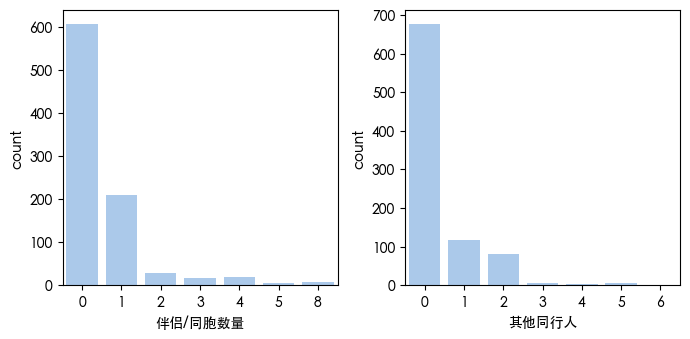

In [22]:
fig, axes = plt.subplots(1, 2)
sns.countplot(cleaned_train, x = "SibSp", ax = axes[0])
axes[0].set_xlabel("伴侣/同胞数量")

sns.countplot(cleaned_train, x = "Parch", ax = axes[1])
axes[1].set_xlabel("其他同行人")
plt.show()

### 船票费用

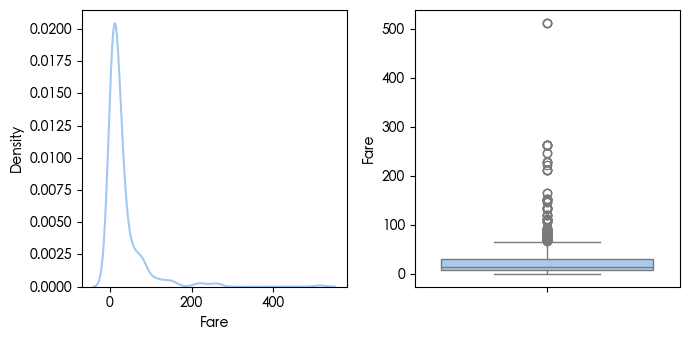

In [23]:
fig, axes = plt.subplots(1, 2)
sns.kdeplot(cleaned_train, x = "Fare", ax = axes[0])
sns.boxplot(cleaned_train, y = "Fare", ax = axes[1])
plt.show()

### 登船港口分布

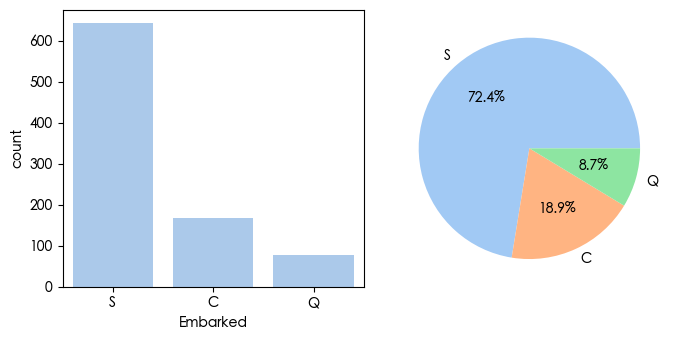

In [24]:
fig, axes = plt.subplots(1, 2)
sns.countplot(cleaned_train, x = "Embarked", ax = axes[0])

em_count = cleaned_train["Embarked"].value_counts()
em_label = em_count.index
axes[1].pie(em_count, labels = em_label, autopct = "%.1f%%")
plt.show()

## 3.2 与存活情况之间的关系

### 船舱等级与存活情况

In [25]:
# 设置figure的大小
plt.rcParams["figure.figsize"] = [3.5, 3.5]

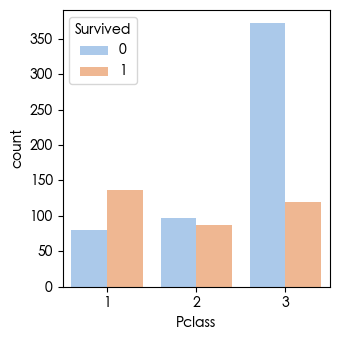

In [26]:
sns.countplot(cleaned_train, x = "Pclass", hue = "Survived")
plt.show()

由上图可以看出，船舱等级越高的旅客存活比例越高

### 性别与存活情况

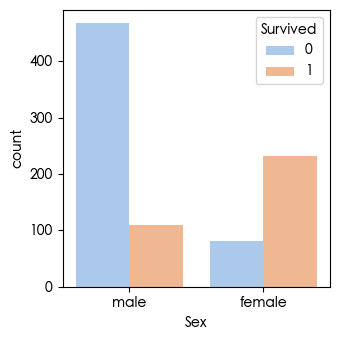

In [27]:
sns.countplot(cleaned_train, x = "Sex", hue = "Survived")
plt.show()

由上图可以看出，女性乘客的存活比例显著高于男性。

### 年龄和存活情况

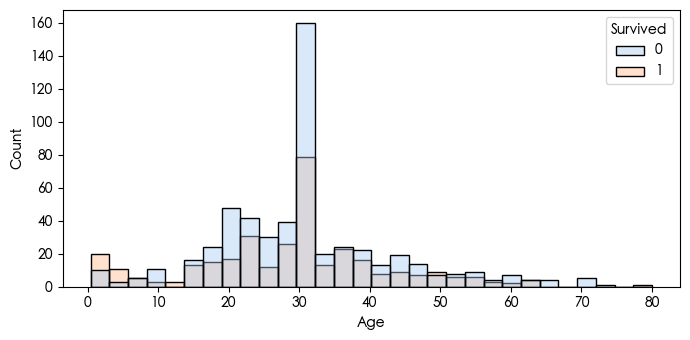

In [28]:
# 设置figure的大小
plt.rcParams["figure.figsize"] = [7, 3.5]
sns.histplot(cleaned_train, x = "Age", hue = "Survived", alpha = 0.4)
plt.show()

除婴儿存活比例高于死亡比例外，其余年龄段死亡人数皆高于存活人数。

### 家庭成员数量与存活情况

In [29]:
cleaned_train["Family_num"] = cleaned_train["SibSp"] + cleaned_train["Parch"]
cleaned_train["Family_num"].value_counts()

Family_num
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

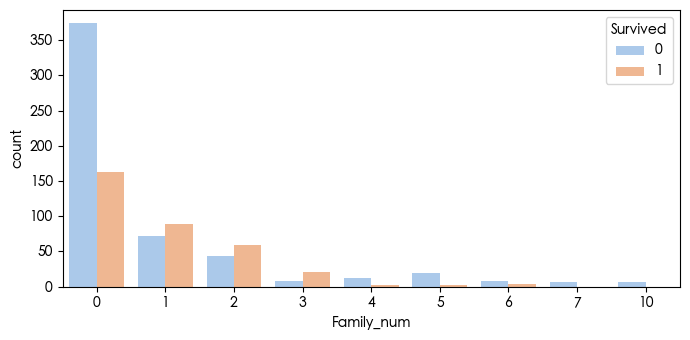

In [30]:
sns.countplot(cleaned_train, x = "Family_num", hue = "Survived")
plt.show()

当家庭成员个数为1-3个时，存活人数高于死亡人数

### 登船港口和存活情况

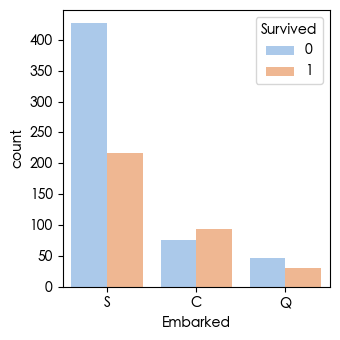

In [31]:
plt.rcParams["figure.figsize"] = [3.5, 3.5]
sns.countplot(cleaned_train, x = "Embarked", hue = "Survived")
plt.show()

# 4. 数据分析

In [32]:
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Family_num   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [33]:
cleaned_train = cleaned_train.drop("Embarked", axis = 1)

## 4.1 设置虚拟变量

In [34]:
cleaned_train = pd.get_dummies(cleaned_train, columns=["Sex", "Pclass"], 
                               dtype = int, drop_first=True)
cleaned_train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_num,Sex_male,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,1


## 4.2 因变量&自变量

In [35]:
y = cleaned_train["Survived"]
X = cleaned_train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)

In [36]:
X = X.drop("Survived", axis = 1)
X

,Age,SibSp,Parch,Fare,Family_num,Sex_male,Pclass_2,Pclass_3
0,22.000000,1,0,7.2500,1,1,0,1
1,38.000000,1,0,71.2833,1,0,0,0
2,26.000000,0,0,7.9250,0,0,0,1
3,35.000000,1,0,53.1000,1,0,0,0
4,35.000000,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0,1,1,0
887,19.000000,0,0,30.0000,0,0,0,0
888,29.699118,1,2,23.4500,3,0,0,1
889,26.000000,0,0,30.0000,0,1,0,0


## 4.3 相关性

In [37]:
X.corr()

,Age,SibSp,Parch,Fare,Family_num,Sex_male,Pclass_2,Pclass_3
Age,1.000000,-0.232625,-0.179191,0.091566,-0.248512,0.084153,0.006589,-0.281004
SibSp,-0.232625,1.000000,0.414838,0.159651,0.890712,-0.114631,-0.055932,0.092548
Parch,-0.179191,0.414838,1.000000,0.216225,0.783111,-0.245489,-0.000734,0.015790
Fare,0.091566,0.159651,0.216225,1.000000,0.217138,-0.182333,-0.118557,-0.413333
Family_num,-0.248512,0.890712,0.783111,0.217138,1.000000,-0.200988,-0.038594,0.071142
Sex_male,0.084153,-0.114631,-0.245489,-0.182333,-0.200988,1.000000,-0.064746,0.137143
Pclass_2,0.006589,-0.055932,-0.000734,-0.118557,-0.038594,-0.064746,1.000000,-0.565210
Pclass_3,-0.281004,0.092548,0.015790,-0.413333,0.071142,0.137143,-0.565210,1.000000


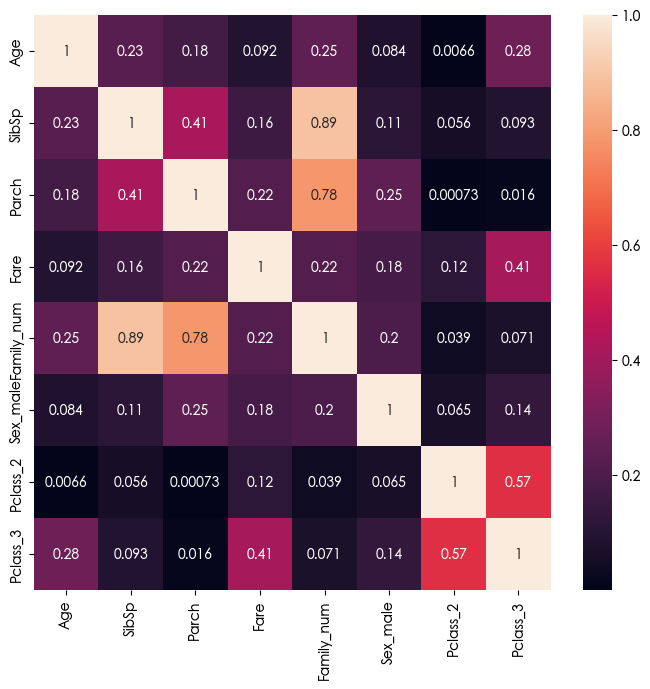

In [38]:
plt.rcParams["figure.figsize"] = [7, 7]

sns.heatmap(X.corr().abs(), annot = True)
plt.show()

In [39]:
X = X.drop(["SibSp", "Parch"], axis = 1)

各变量之间的相关系数均小于0.8，无需进行修改。

## 4.4 截距

In [40]:
X = sm.add_constant(X)

In [41]:
X.head()

,const,Age,Fare,Family_num,Sex_male,Pclass_2,Pclass_3
0,1.0,22.0,7.2500,1,1,0,1
1,1.0,38.0,71.2833,1,0,0,0
2,1.0,26.0,7.9250,0,0,0,1
3,1.0,35.0,53.1000,1,0,0,0
4,1.0,35.0,8.0500,0,1,0,1


## 4.5 建立模型

In [42]:
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


In [43]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                  0.3339
Time:                        21:37:22   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8097      0.445      8.568      0.000       2.938       4.681
Age           -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare           0.0032      0.002      1.311      0.190      -0.002       0.008
Family_num    -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Sex_male      -2.7759      0.199    -13.980      0.000      -3.165      -2.387
Pclass_2      -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3      -2.1324      0.289     -7.373      0.000      -2.699      -1.566
==============================================================================
"""

`Parch` `Fare` `Embarked`的结果都不显著，考虑删除

In [44]:
X = X.drop(["Fare"], axis = 1)

In [45]:
X.head()

,const,Age,Family_num,Sex_male,Pclass_2,Pclass_3
0,1.0,22.0,1,1,0,1
1,1.0,38.0,1,0,0,0
2,1.0,26.0,0,0,0,1
3,1.0,35.0,1,0,0,0
4,1.0,35.0,0,1,0,1


In [46]:
result_1 = sm.Logit(y, X).fit()
result_1.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                  0.3323
Time:                        21:37:22   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
Family_num    -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
==============================================================================
"""

In [64]:
# 年龄系数的含义
np.exp(-0.0395)

np.float64(0.9612699539905982)

年龄每增加一岁，生还概率变为0.96

In [65]:
# Familynum
np.exp(-0.2186)

np.float64(0.803643111115195)

In [66]:
# Pclass_2
np.exp(-1.17)

np.float64(0.31036694126548503)

In [68]:
# Pclass_3
np.exp(-2.3458)

np.float64(0.09577055503172162)

In [70]:
# Sex_male
np.exp(-2.7854)

np.float64(0.061704402333015156)

# 5. 预测

In [48]:
test_data = pd.read_csv("titanic_test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


填充`Age`的缺失值

In [50]:
cleaned_test_data = test_data.copy()

In [51]:
cleaned_test_data['Age'] = cleaned_test_data['Age'].fillna(cleaned_test_data['Age'].mean())
cleaned_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [52]:
cleaned_test_data["Family_num"] = cleaned_test_data["SibSp"] + cleaned_test_data["Parch"]

In [53]:
# 设置Pclass为分类变量
cleaned_test_data["Pclass"] = pd.Categorical(cleaned_test_data["Pclass"], 
                                             categories=[1, 2, 3])
cleaned_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_num
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [54]:
cleaned_test_data["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [55]:
# 设置Sex为分类变量
cleaned_test_data["Sex"] = pd.Categorical(cleaned_test_data["Sex"], 
                                          categories=["male", "female"])


In [56]:
# 获得虚拟变量
cleaned_test_data = pd.get_dummies(cleaned_test_data, columns=["Pclass", "Sex"],
                                  dtype = int)

In [57]:
# 获得预测的数据“原料”
new_observation = cleaned_test_data[["Age", "Family_num", "Sex_male", "Pclass_2", "Pclass_3"]]
new_observation

,Age,Family_num,Sex_male,Pclass_2,Pclass_3
0,34.50000,0,1,0,1
1,47.00000,1,0,0,1
2,62.00000,0,1,1,0
3,27.00000,0,1,0,1
4,22.00000,2,0,0,1
...,...,...,...,...,...
413,30.27259,0,1,0,1
414,39.00000,0,0,0,0
415,38.50000,0,1,0,1
416,30.27259,0,1,0,1


In [58]:
# 新增截距列
new_observation = sm.add_constant(new_observation)
new_observation.head()

,const,Age,Family_num,Sex_male,Pclass_2,Pclass_3
0,1.0,34.5,0,1,0,1
1,1.0,47.0,1,0,0,1
2,1.0,62.0,0,1,1,0
3,1.0,27.0,0,1,0,1
4,1.0,22.0,2,0,0,1


In [59]:
predicted_value = result_1.predict(new_observation)

In [62]:
predicted_value

0      0.080778
1      0.411265
2      0.086917
3      0.105684
4      0.601091
         ...   
413    0.094075
414    0.925647
415    0.069798
416    0.094075
417    0.062849
Length: 418, dtype: float64

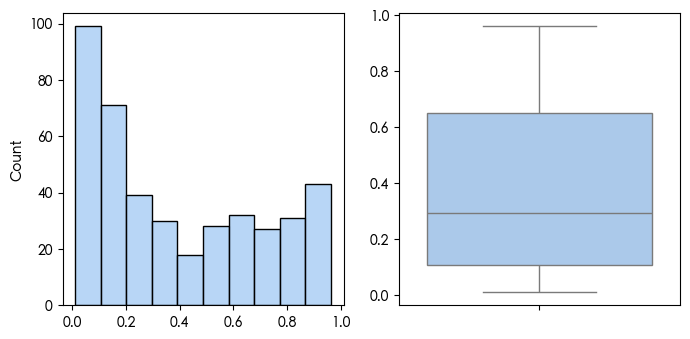

In [63]:
plt.rcParams["figure.figsize"] = [7, 3.5]

fig, axes = plt.subplots(1, 2)
sns.histplot(predicted_value, ax = axes[0])
sns.boxplot(predicted_value, ax = axes[1])
plt.show()